## Libraries for TSA using LSTM

In [1]:
import pandas_datareader as pdr
import matplotlib.pyplot as plt

## Apple Stock data for TSA

In [2]:
df = pdr.get_data_tiingo('AAPL', api_key='ab2882f6485e2828c46882b863cc7c8cdaaef007')
df.head()

C:\Users\sinch\AppData\Local\Temp\ipykernel_4516\918027198.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pdr.get_data_tiingo('AAPL', api_key='ab2882f6485e2828c46882b863cc7c8cdaaef007')


close    high      low    open    volume  \
symbol date                                                                   
AAPL   2017-12-12 00:00:00+00:00  171.70  172.39  171.461  172.15  18945457   
       2017-12-13 00:00:00+00:00  172.27  173.54  172.000  172.50  23142242   
       2017-12-14 00:00:00+00:00  172.22  173.13  171.650  172.40  20219307   
       2017-12-15 00:00:00+00:00  173.97  174.17  172.460  173.63  37054632   
       2017-12-18 00:00:00+00:00  176.42  177.20  174.860  174.88  28831533   

                                   adjClose    adjHigh     adjLow    adjOpen  \
symbol date                                                                    
AAPL   2017-12-12 00:00:00+00:00  40.815488  40.979511  40.758674  40.922459   
       2017-12-13 00:00:00+00:00  40.950985  41.252882  40.886802  41.005659   
       2017-12-14 00:00:00+00:00  40.939099  41.155419  40.803602  40.981888   
       2017-12-15 00:00:00+00:00  41.355099  41.402642  40.996151  41.274276   
       2017-12-18 00:00:00+00:00  41.937498  42.122915  41.566664  41.571419   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
AAPL   2017-12-12 00:00:00+00:00   75781828      0.0          1.0  
       2017-12-13 00:00:00+00:00   92568968      0.0          1.0  
       2017-12-14 00:00:00+00:00   80877228      0.0          1.0  
       2017-12-15 00:00:00+00:00  148218528      0.0          1.0  
       2017-12-18 00:00:00+00:00  115326132      0.0          1.0

In [3]:
df.tail()

close      high     low     open    volume  \
symbol date                                                                     
AAPL   2022-12-05 00:00:00+00:00  146.63  150.9199  145.77  147.770  68826442   
       2022-12-06 00:00:00+00:00  142.91  147.3000  141.92  147.075  64727186   
       2022-12-07 00:00:00+00:00  140.94  143.3700  140.00  142.190  69721094   
       2022-12-08 00:00:00+00:00  142.65  143.5200  141.10  142.360  62128338   
       2022-12-09 00:00:00+00:00  142.16  145.5700  140.90  142.340  76097011   

                                  adjClose   adjHigh  adjLow  adjOpen  \
symbol date                                                             
AAPL   2022-12-05 00:00:00+00:00    146.63  150.9199  145.77  147.770   
       2022-12-06 00:00:00+00:00    142.91  147.3000  141.92  147.075   
       2022-12-07 00:00:00+00:00    140.94  143.3700  140.00  142.190   
       2022-12-08 00:00:00+00:00    142.65  143.5200  141.10  142.360   
       2022-12-09 00:00:00+00:00    142.16  145.5700  140.90  142.340   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
AAPL   2022-12-05 00:00:00+00:00   68826442      0.0          1.0  
       2022-12-06 00:00:00+00:00   64727186      0.0          1.0  
       2022-12-07 00:00:00+00:00   69721094      0.0          1.0  
       2022-12-08 00:00:00+00:00   62128338      0.0          1.0  
       2022-12-09 00:00:00+00:00   76097011      0.0          1.0

### Dataframing: Closing Price data for forecasting

In [4]:
df1 = df.reset_index()['close']
df1.head()

0    171.70
1    172.27
2    172.22
3    173.97
4    176.42
Name: close, dtype: float64

### Shape of the dataframe

In [5]:
df1.shape

(1258,)

## Trend check of the data

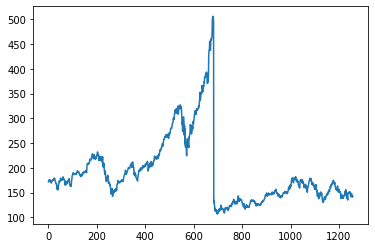

In [6]:
plt.plot(df1)

## Scaling the data in range: 0 to 1

In [7]:
import numpy as np 
from sklearn.preprocessing import MinMaxScaler

In [8]:
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))
df1.shape

(1258, 1)

## Train-Test data split

In [9]:
training_size = int(len(df1)*0.65)
test_size = len(df1)-training_size
train_data, test_data = df1[0:training_size,:], df1[training_size:len(df1),:1]

## Data creation for prediction

In [10]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

### Data creation: Train & Test

In [11]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)
X_train

array([[0.1624546 , 0.16388228, 0.16375704, ..., 0.17545398, 0.19283657,
        0.19616781],
       [0.16388228, 0.16375704, 0.16814026, ..., 0.19283657, 0.19616781,
        0.19839699],
       [0.16375704, 0.16814026, 0.17427677, ..., 0.19616781, 0.19839699,
        0.20167815],
       ...,
       [0.03571697, 0.03594239, 0.03474014, ..., 0.03328741, 0.03651847,
        0.02384471],
       [0.03594239, 0.03474014, 0.0305072 , ..., 0.03651847, 0.02384471,
        0.0356794 ],
       [0.03474014, 0.0305072 , 0.02289292, ..., 0.02384471, 0.0356794 ,
        0.03291171]])

## Dataset reshaping for model input

In [12]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

## Tensorflow Imports

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

## LSTM Model initiation

In [14]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

### Model summary

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


### Model fitting

In [16]:
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
12/12 [==============================] - 16s 525ms/step - loss: 0.0552 - val_loss: 0.0131
Epoch 2/100
12/12 [==============================] - 4s 323ms/step - loss: 0.0144 - val_loss: 0.0043
Epoch 3/100
12/12 [==============================] - 4s 317ms/step - loss: 0.0117 - val_loss: 7.5533e-04
Epoch 4/100
12/12 [==============================] - 4s 299ms/step - loss: 0.0086 - val_loss: 4.4925e-04
Epoch 5/100
12/12 [==============================] - 4s 315ms/step - loss: 0.0078 - val_loss: 6.1317e-04
Epoch 6/100
12/12 [==============================] - 4s 303ms/step - loss: 0.0072 - val_loss: 4.5344e-04
Epoch 7/100
12/12 [==============================] - 4s 304ms/step - loss: 0.0066 - val_loss: 7.8403e-04
Epoch 8/100
12/12 [==============================] - 4s 306ms/step - loss: 0.0061 - val_loss: 8.4777e-04
Epoch 9/100
12/12 [==============================] - 4s 304ms/step - loss: 0.0055 - val_loss: 7.7592e-04
Epoch 10/100
12/12 [==============================] - 4s 305ms

## Prediction of train & test data

In [17]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

11/11 [==============================] - 1s 72ms/step


### Inverse transformation of predicted data

In [18]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

## Error calculation

In [19]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

233.597083459411

In [20]:
math.sqrt(mean_squared_error(y_test, test_predict))

154.32496557004512

In [21]:
mse = mean_squared_error(y_test, test_predict)
mse**0.5

154.32496557004512

## Train-Test prediction plot

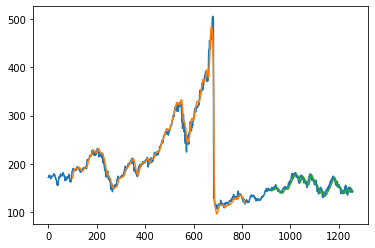

In [22]:
look_back = 100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [23]:
len(test_data)

441

In [24]:
x_input = test_data[341:].reshape(1, -1)
x_input.shape

(1, 100)

In [25]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

## Dataset to array conversion formula

In [26]:
from numpy import array

lst_output = []
n_steps = 100
i = 0
while i < 30:
    if len(temp_input)>100:
        x_input = array(temp_input[1:])
        print(f'{i} day input {x_input}')
        x_input = x_input.reshape(1, n_steps, 1)
        yhat = model.predict(x_input, verbose=0)
        print(f'{i} day output {yhat}')
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i = i + 1
    else:
        x_input = x_input.reshape(1, n_steps, 1)
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i = i + 1

print(lst_output)

[0.09051039]
101
1 day input [0.1183469  0.11549155 0.11211021 0.12510958 0.12651221 0.13943644
 0.13693175 0.1331747  0.14850344 0.14770194 0.14654978 0.14534753
 0.14547276 0.15629305 0.15441453 0.16345648 0.1661866  0.16578585
 0.16959299 0.16859111 0.16200376 0.15211021 0.15125861 0.15201002
 0.15827176 0.14221666 0.13660614 0.13041954 0.1261866  0.12804008
 0.12265498 0.11944897 0.12303068 0.11927364 0.1265623  0.14174076
 0.11772073 0.12140263 0.11403882 0.10985598 0.11932373 0.1253851
 0.11742016 0.11496556 0.10917971 0.11003131 0.11251096 0.10770194
 0.08926738 0.07854728 0.08919224 0.09833438 0.09908579 0.09665623
 0.08328115 0.0841077  0.08050094 0.07889793 0.09054477 0.07899812
 0.08909205 0.09244834 0.09272386 0.09154665 0.10126487 0.10672511
 0.11396368 0.10647464 0.09507827 0.12247965 0.11646838 0.10973075
 0.09565435 0.08025047 0.07899812 0.08035066 0.08180338 0.07020664
 0.10026299 0.10735128 0.10379461 0.10820288 0.10507201 0.10990607
 0.11133375 0.10311835 0.10855354 

## Days determination for plotting

In [27]:
day_new = np.arange(1, 101)
day_pred = np.arange(101, 131)

In [28]:
df2 = df1.tolist()
df2.extend(lst_output)

## Prediction plot

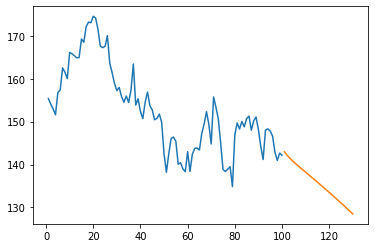

In [29]:
plt.plot(day_new, scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))

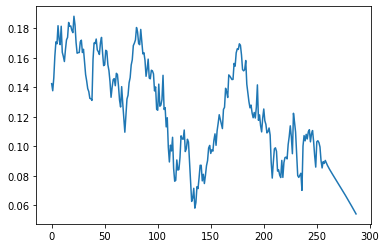

In [30]:
plt.plot(df2[1000:])

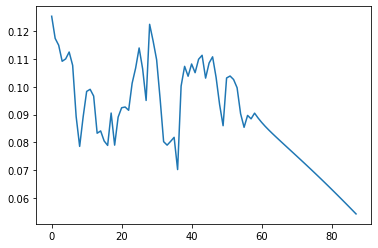

In [31]:
plt.plot(df2[1200:])